In [12]:
import import_ipynb
import numpy as np
import matplotlib.pyplot as plt
from mini_project1 import *

(200, 192)
[[176 177 178 ... 182 160 125]
 [177 176 177 ... 170 131  88]
 [176 176 176 ... 145  98  52]
 ...
 [100  95  99 ...  11  14  16]
 [ 98  94 103 ...  10   8   3]
 [ 64  64  64 ...  71  71  71]]


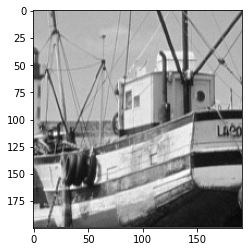

In [13]:
# Test image reading and displaying

mat9x9 = np.arange(81).reshape(9, 9)
boat = imgRead('fishing_boat.bmp', 'L')
print(np.shape(boat))
imgShow(boat, 'gray')
print(boat)

In [14]:
# Test sampling, slicing and recombining with dummy matrix

# b = imgSample(a, 8)
def test_sampling(arr, blk, sample):
    '''
    :return: sliced array, sampled array, combined image
    '''
    h, w = arr.shape
    slicedArr = imgSlice(arr, blk)
    sampledArr = np.array([imgSample(blk, sample) for blk in slicedArr])
    recombinedImg = recombine(sampledArr, h, w)
    return slicedArr, sampledArr, recombinedImg

def show_sampling(origin, sliced, recombined):
    print('Matrix A: ')
    print(origin)
    print()    
    print('Sliced A: ')
    print(sliced)
    print()
    print('Sampled A: ')
    print(recombined)
    imgShow(recombined, 'gray')

In [15]:
def test_dct(arr, blk):
    h, w = arr.shape
    c = imgSlice(arr, blk)
    dctArr = np.array([img2DCT(B) for B in c])
    dctImg = recombine(dctArr, h, w)
    return dctArr, dctImg

Text(0.5, 1.0, 'An 8x8 DCT block')

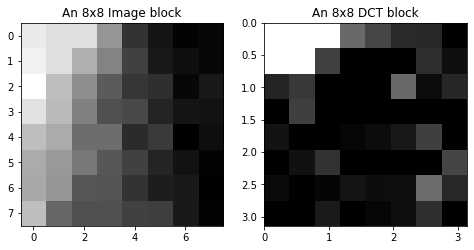

In [33]:
from numpy import r_
im = imgRead('lena.bmp', 'L')

imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = img2DCT( im[i:(i+8),j:(j+8)] )

pos = 128

# Extract a block from image and the dct of that block
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")
plt.subplot(1, 2, 2)
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

Text(0.5, 1.0, 'All 8x8 DCTs of the image')

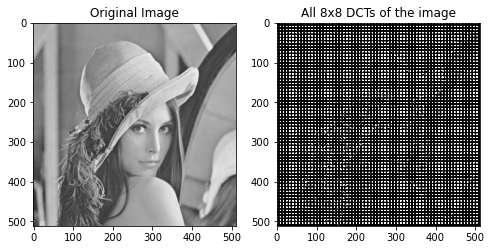

In [32]:
# Display original image and entire DCT
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(lena, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(dct,cmap='gray',vmax = np.max(darr)*0.01,vmin = 0)
plt.title( "All 8x8 DCTs of the image")

Text(0.5, 1.0, 'All 8x8 DCTs of the image')

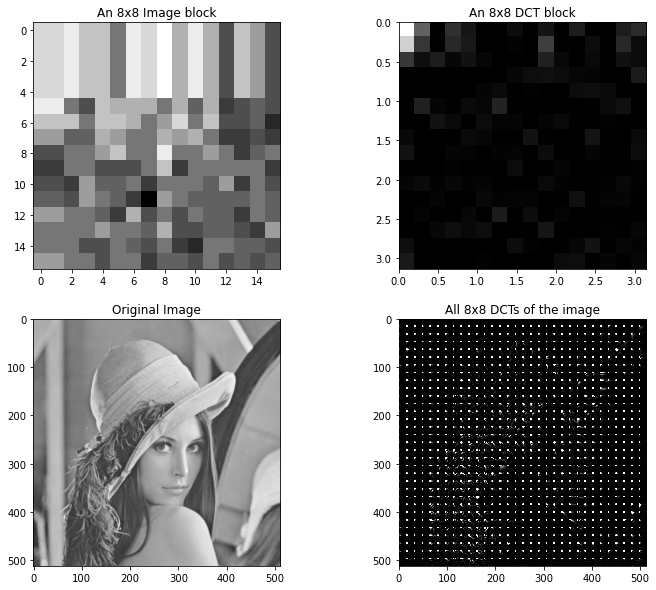

In [16]:
lena = imgRead('lena.bmp', 'L')
a,b,c = test_sampling(lena, 16, 256)
darr, dimg = test_dct(lena, 16)

# Extract a block from image
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.imshow(a[0],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.subplot(2, 2, 2)
plt.imshow(darr[0],cmap='gray',vmax= np.max(darr)*0.01,vmin = 0, extent=[0,np.pi,np.pi,0])
plt.title( "An 8x8 DCT block")

# Display original image and entire DCT
plt.subplot(2, 2, 3)
plt.imshow(lena, cmap='gray')
plt.title("Original Image")
plt.subplot(2, 2, 4)
plt.imshow(dimg,cmap='gray',vmax = np.max(darr)*0.01,vmin = 0)
plt.title( "All 8x8 DCTs of the image")

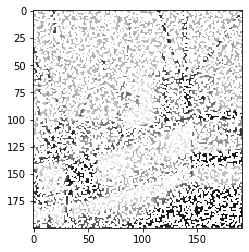

In [28]:
# Test restoring image

restoreArr = np.array([img2IDCT(B) for B in darr])
restoreImg = recombine(restoreArr, boat.shape[0], boat.shape[1])

def compareImg(original, restoreImg):
    plt.figure(figsize=(10, 5))
    plt.subplots_adjust(wspace=0.1)
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(restoreImg, cmap='gray')
    plt.title("Sampled Image")

# compareImg(boat, c)
imgShow(c, cmap='gray')

(64, 8, 8)


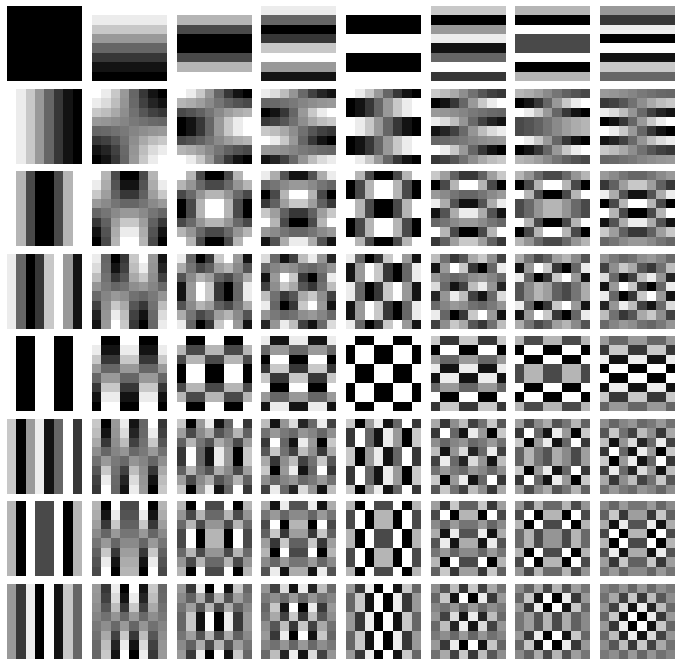

In [27]:
n = 8
imageSet = getDCTBasis(n)

print(imageSet.shape)

        
plt.figure(figsize=(12, 12))
for i in range(len(imageSet)):
    plt.subplot(n, n, i+1)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.axis('off')
    plt.imshow(imageSet[i],cmap='gray')
#     plt.title('{}'.format(i+1))

In [8]:
# To prove we get the same coefficient either way

arr2 = darr[0].T.reshape(-1)
sum = np.zeros((8, 8))
for i in range(64):
    sum += arr2[i]*imageSet[i]
print(sum)
print(a[0])

T_d = transformDCTMatrix(imageSet)
coef_d = np.linalg.inv(T_d) @ a[0].reshape(-1)

print(T_d)
# print(darr[0].T.reshape(-1))
# (T_d@getDCTCoef(a[0], 8)).reshape(8, -1)
# print(getDCTCoef(a[0], 8))

[[176. 177. 178. 179. 179. 178. 181. 179.]
 [177. 176. 177. 178. 178. 178. 178. 177.]
 [176. 176. 176. 178. 177. 178. 177. 178.]
 [177. 177. 178. 177. 178. 177. 178. 177.]
 [180. 180. 179. 179. 178. 177. 182. 176.]
 [181. 181. 180. 179. 179. 177. 184. 176.]
 [179. 179. 178. 182. 185. 178. 178. 179.]
 [178. 178. 179. 181. 183. 180. 182. 181.]]
[[176 177 178 179 179 178 181 179]
 [177 176 177 178 178 178 178 177]
 [176 176 176 178 177 178 177 178]
 [177 177 178 177 178 177 178 177]
 [180 180 179 179 178 177 182 176]
 [181 181 180 179 179 177 184 176]
 [179 179 178 182 185 178 178 179]
 [178 178 179 181 183 180 182 181]]


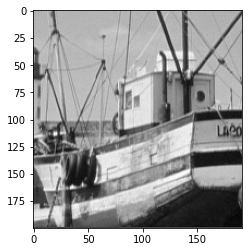

In [63]:
arrBlk = []
for i in range(len(darr)):
#     coef = darr[i].T.reshape(-1)
    coef = getDCTCoef(a[i], 8)
    sum = np.zeros((8, 8))
    for j in range(64):
        sum += coef[j]*imageSet[j]
    arrBlk.append(sum)
result = recombine(np.array(arrBlk), boat.shape[0], boat.shape[1])   

# compareImg(boat, result)
imgShow(result, cmap='gray')

### Sampled Image

In [75]:
# b is 56 sampled out of 64

a,b,c = test_sampling(boat, 8, 60)

s = 54  # sampled data
m = s // 6  # test size
M = 20  # iteration

from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, GridSearchCV

print(a[0].reshape(-1))
print(b[0].reshape(-1))

[176 177 178 179 179 178 181 179 177 176 177 178 178 178 178 177 176 176
 176 178 177 178 177 178 177 177 178 177 178 177 178 177 180 180 179 179
 178 177 182 176 181 181 180 179 179 177 184 176 179 179 178 182 185 178
 178 179 178 178 179 181 183 180 182 181]
[176.  nan 178. 179. 179. 178. 181. 179. 177. 176. 177. 178. 178. 178.
 178. 177.  nan 176. 176. 178. 177. 178. 177. 178. 177. 177. 178. 177.
 178. 177. 178. 177. 180.  nan 179. 179. 178. 177. 182. 176. 181. 181.
 180. 179. 179. 177. 184. 176. 179. 179. 178. 182. 185. 178. 178. 179.
  nan 178. 179. 181. 183. 180. 182. 181.]


In [52]:
cv = ShuffleSplit(n_splits=M, test_size=m, random_state=0)

b0 = b[0].reshape(-1)
mask = np.invert(np.isnan(b0))
sampled_b0 = b0[mask]
sampled_T = T_d[mask]    

# define model
model = linear_model.Lasso()
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 10, 0.005)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(sampled_T, sampled_b0)


# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# print(darr[3].T.reshape(-1))
# print(clf.coef_)
# print(clf.alpha_)
# print(clf.score(sampled_T, sampled_b0))

MAE: -1.395
Config: {'alpha': 0.07}


In [77]:
recoverArr = []
cv = ShuffleSplit(n_splits=M, test_size=m, random_state=0)

for i in range(len(b)):
    b0 = b[i].reshape(-1)
    mask = np.invert(np.isnan(b0))
    sampled_b0 = b0[mask]
    sampled_T = T_d[mask]    
    clf = linear_model.LassoCV(alphas=np.arange(0.005, 50.005, 0.03), cv=cv, n_jobs=-1)
    clf.fit(sampled_T, sampled_b0)
    print('block{} alpha: {}'.format(i, clf.alpha_))
#     sum_1 = np.zeros((8, 8))
#     for j in range(64):
#         sum_1 += clf.coef_[j]*imageSet[j]
    sum_1 = (T_d @ clf.coef_).reshape(8, 8)
    recoverArr.append(sum_1)


block0 alpha: 0.06499999999999999
block1 alpha: 0.15499999999999997
block2 alpha: 0.034999999999999996
block3 alpha: 0.034999999999999996
block4 alpha: 0.034999999999999996
block5 alpha: 0.06499999999999999
block6 alpha: 0.034999999999999996
block7 alpha: 49.98499999999999
block8 alpha: 0.034999999999999996
block9 alpha: 0.005
block10 alpha: 0.034999999999999996
block11 alpha: 0.06499999999999999
block12 alpha: 0.09499999999999999
block13 alpha: 0.034999999999999996
block14 alpha: 0.034999999999999996
block15 alpha: 0.06499999999999999
block16 alpha: 0.034999999999999996
block17 alpha: 0.09499999999999999
block18 alpha: 49.98499999999999
block19 alpha: 0.034999999999999996
block20 alpha: 0.034999999999999996
block21 alpha: 0.034999999999999996
block22 alpha: 0.06499999999999999
block23 alpha: 0.034999999999999996
block24 alpha: 0.005
block25 alpha: 0.06499999999999999
block26 alpha: 0.09499999999999999
block27 alpha: 0.06499999999999999
block28 alpha: 49.98499999999999
block29 alpha: 0

C:\Users\Phil\anaconda3\envs\ECE580\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7584291882341683, tolerance: 1.4289686274509805
  model = cd_fast.enet_coordinate_descent(


block51 alpha: 0.06499999999999999
block52 alpha: 0.034999999999999996
block53 alpha: 49.98499999999999
block54 alpha: 0.034999999999999996
block55 alpha: 0.06499999999999999
block56 alpha: 0.034999999999999996
block57 alpha: 0.034999999999999996
block58 alpha: 0.06499999999999999
block59 alpha: 0.034999999999999996
block60 alpha: 0.06499999999999999
block61 alpha: 0.09499999999999999
block62 alpha: 0.12499999999999999
block63 alpha: 0.06499999999999999
block64 alpha: 0.034999999999999996
block65 alpha: 0.034999999999999996
block66 alpha: 0.09499999999999999
block67 alpha: 0.034999999999999996
block68 alpha: 0.034999999999999996
block69 alpha: 0.09499999999999999
block70 alpha: 0.15499999999999997
block71 alpha: 0.15499999999999997
block72 alpha: 0.06499999999999999
block73 alpha: 0.06499999999999999
block74 alpha: 0.12499999999999999
block75 alpha: 0.06499999999999999
block76 alpha: 0.034999999999999996
block77 alpha: 0.034999999999999996
block78 alpha: 0.06499999999999999
block79 alp

C:\Users\Phil\anaconda3\envs\ECE580\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6442870198506885, tolerance: 1.3822588235294118
  model = cd_fast.enet_coordinate_descent(


block266 alpha: 0.09499999999999999
block267 alpha: 0.034999999999999996
block268 alpha: 0.06499999999999999
block269 alpha: 0.12499999999999999
block270 alpha: 0.24499999999999997
block271 alpha: 0.034999999999999996
block272 alpha: 0.034999999999999996
block273 alpha: 0.034999999999999996
block274 alpha: 0.12499999999999999
block275 alpha: 0.06499999999999999
block276 alpha: 0.12499999999999999
block277 alpha: 0.034999999999999996
block278 alpha: 0.034999999999999996
block279 alpha: 0.09499999999999999
block280 alpha: 0.12499999999999999
block281 alpha: 0.034999999999999996
block282 alpha: 0.18499999999999997
block283 alpha: 0.06499999999999999
block284 alpha: 0.09499999999999999
block285 alpha: 0.09499999999999999
block286 alpha: 0.09499999999999999
block287 alpha: 0.06499999999999999
block288 alpha: 0.005
block289 alpha: 0.06499999999999999
block290 alpha: 0.09499999999999999
block291 alpha: 0.09499999999999999
block292 alpha: 0.09499999999999999
block293 alpha: 0.005
block294 alph

C:\Users\Phil\anaconda3\envs\ECE580\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6862867305737366, tolerance: 1.6174509803921566
  model = cd_fast.enet_coordinate_descent(


block374 alpha: 0.12499999999999999
block375 alpha: 0.034999999999999996
block376 alpha: 0.15499999999999997
block377 alpha: 0.034999999999999996
block378 alpha: 0.06499999999999999
block379 alpha: 0.06499999999999999
block380 alpha: 0.034999999999999996
block381 alpha: 0.034999999999999996
block382 alpha: 0.09499999999999999
block383 alpha: 0.12499999999999999
block384 alpha: 0.12499999999999999
block385 alpha: 0.21499999999999997
block386 alpha: 0.034999999999999996
block387 alpha: 0.21499999999999997
block388 alpha: 0.06499999999999999
block389 alpha: 0.06499999999999999
block390 alpha: 0.06499999999999999
block391 alpha: 0.21499999999999997
block392 alpha: 0.12499999999999999
block393 alpha: 0.005
block394 alpha: 0.034999999999999996
block395 alpha: 0.09499999999999999
block396 alpha: 0.06499999999999999
block397 alpha: 0.034999999999999996
block398 alpha: 0.09499999999999999
block399 alpha: 0.06499999999999999
block400 alpha: 0.034999999999999996
block401 alpha: 0.0949999999999999

[[183 181 176 180 176 183 185 178]
 [181 179 173 180 177 182 183 179]
 [178 180 174 179 179 181 183 175]
 [177 183 178 178 181 179 183 167]
 [180 183 179 179 181 178 186 159]
 [182 181 178 180 182 178 187 152]
 [186 181 176 180 179 177 184 155]
 [183 182 179 180 182 177 183 151]]
[112.77134577 112.98200837 117.30419063 114.7324703  112.77517514
 117.25871119 117.4756025  116.03578181 115.37432111 115.17761431
 114.72749681 116.37271237 114.8560607  117.05230826 123.22997038
 111.31485425 148.67604979 150.74366483  88.77869617  45.29809749
  70.66959178 145.80521974 134.38343182 147.05187266 114.57286111
 115.06798959 114.77460353 114.78178144 115.13520141 115.19601779
 115.28934676 115.18393912 115.70462166 115.70462166 115.70462166
 115.70462166 115.70462166 115.70462166 115.70462166 115.70462166
 115.14130838 116.11993702 114.37361117 116.90746013 113.14758785
 117.89625735 114.8801697  116.49339604 115.9037884  115.37048802
 115.08646581 115.40238499 115.80405306 115.79555731 115.51

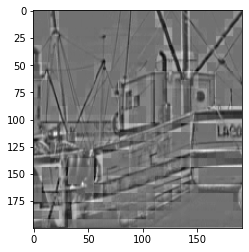

In [78]:
recoverImg = recombine(np.array(recoverArr), boat.shape[0], boat.shape[1])  
# scaleImg = np.interp(recoverImg, (recoverImg.min(), recoverImg.max()), (0, 255))

print(a[9])
print(scaleImg[9])
plt.imshow(recoverImg, cmap='gray')

In [5]:
lena = imgRead('lena.bmp', 'L')
lena.shape

(512, 512)